# About this notebook
This is the 1st notebook of tackling the Food-101 challenge, it starts with data exploration. The process is done in the following steps:

1. Downloading the entire data set
2. Explore the data-set structure, it has imagenet style with images folder contains 101 sub-folders, and each folder contains 750 training images + 250 test images. The meta folder contains labeling description for train and test set
3. Turn the two train.txt and test.txt from dataset to two csv files for future usage.

After data exploration and making the two csv files, quickly deployed a baseline model of Resnet-34 with 20% of the entire dataset to understand the problem (if Resnet arch is performing well for this kind of tasks as I expected: Balanced dataset, Predicting only 1 classes from each image - Multi-classification)

This notebook servers the understanding of the dataset and baseline model, the future more complexed model should at least perform better than the baseline model.

Post analysis is done in the end of this notebook

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = download_data('http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz',ext='')

In [3]:
!ls '/home/jupyter/.fastai/data/'

camvid		 humpback			 mnist_sample
camvid.tgz	 humpback-stage-1-res50-224.pth  oxford-iiit-pet
Cancer		 humpback-stage-1-rn34.pth	 pascal_2007
food-101	 humpback-stage-2-res50-224.pth  pascal_2007.tgz
food-101.tar.gz  mnist.pkl.gz			 planet


In [4]:
dest = path.parent/'food-101'
dest

PosixPath('/home/jupyter/.fastai/data/food-101')

In [14]:
dest.mkdir(parents=True,exist_ok=True)

In [15]:
!tar -xf {path} -C '/home/jupyter/.fastai/data/food-101'

In [19]:
!ls {dest}/'food-101'

images	license_agreement.txt  meta  README.txt


In [20]:
!cat {dest}/'food-101/README.txt'

Readme

Structure:
----------
pec/
    images/
        <class_name>/
            <image_id>.jpg
    meta/
        classes.txt
        labels.txt
        test.json
        test.txt
        train.json
        train.txt

All images can be found in the "images" folder and are organized per class. All
image ids are unique and correspond to the foodspotting.com review ids. Thus
the original articles can retrieved trough
  http://www.foodspotting.com/reviews/<image_id>
or through the foodspotting api (http://www.foodspotting.com/api).

The test/train splitting used in the experiment of our paper, can be found in
the "meta" directory.

For any questions contact bossard@vision.ee.ethz.ch



In [5]:
!cat {dest}/'food-101/meta/classes.txt' | head -10

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


In [7]:
!cat {dest}/'food-101/meta/train.txt' | head -10

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856
cat: write error: Broken pipe


In [12]:
test_str = 'apple_pie/1005649'
test_str.split('/')[1]

'1005649'

In [13]:
path = Path(dest/'food-101')
path.ls()

[PosixPath('/home/jupyter/.fastai/data/food-101/food-101/README.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/images'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/license_agreement.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/meta'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/total.csv')]

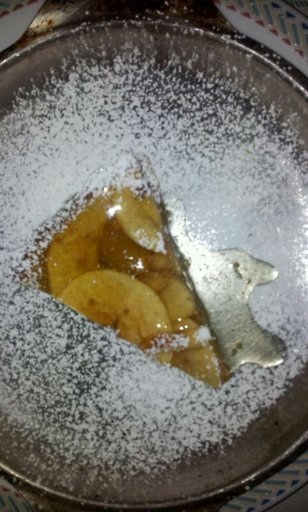

In [14]:
open_image(path/'images'/test_str.split('/')[0]/(test_str.split('/')[1]+'.jpg'))

In [115]:
fn = []
label = []
def prepare_csv(path):
    with open(path) as f:
        for line in f:
            l,fname = line.strip('\n').split('/')
            fn.append(l + '/' + fname + '.jpg')
            label.append(l)

In [116]:
prepare_csv(dest/'food-101/meta/test.txt')

In [117]:
len(fn),len(label)

(25250, 25250)

In [68]:
750*101+25250

101000

In [21]:
import pandas as pd
import numpy as np

In [111]:
df_train = pd.DataFrame(list(zip(fn,label)),columns=['fn','label'])

In [114]:
df_train.head()

,fn,label,is_valid
0,apple_pie/1005649.jpg,apple_pie,0
1,apple_pie/1014775.jpg,apple_pie,0
2,apple_pie/1026328.jpg,apple_pie,0
3,apple_pie/1028787.jpg,apple_pie,0
4,apple_pie/1043283.jpg,apple_pie,0


In [113]:
df_train['is_valid'] = 0

In [118]:
df_test = pd.DataFrame(list(zip(fn,label)),columns=['fn','label'])
df_test.head()

,fn,label
0,apple_pie/1011328.jpg,apple_pie
1,apple_pie/101251.jpg,apple_pie
2,apple_pie/1034399.jpg,apple_pie
3,apple_pie/103801.jpg,apple_pie
4,apple_pie/1038694.jpg,apple_pie


In [119]:
df_test['is_valid'] = 1
df_test.head()

,fn,label,is_valid
0,apple_pie/1011328.jpg,apple_pie,1
1,apple_pie/101251.jpg,apple_pie,1
2,apple_pie/1034399.jpg,apple_pie,1
3,apple_pie/103801.jpg,apple_pie,1
4,apple_pie/1038694.jpg,apple_pie,1


In [120]:
df = pd.concat([df_train,df_test])
df.head()

,fn,label,is_valid
0,apple_pie/1005649.jpg,apple_pie,0
1,apple_pie/1014775.jpg,apple_pie,0
2,apple_pie/1026328.jpg,apple_pie,0
3,apple_pie/1028787.jpg,apple_pie,0
4,apple_pie/1043283.jpg,apple_pie,0


In [121]:
df[df['is_valid']==1].count()

fn          25250
label       25250
is_valid    25250
dtype: int64

In [124]:
df.to_csv('total.csv',index=False)

In [69]:
df_train.to_csv('train.csv',index=False)
df_test.to_csv('test.csv',index=False)

In [125]:
!cp /home/jupyter/dl_related/fellowship/total.csv {dest}/'food-101'

In [15]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/food-101/food-101/README.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/images'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/license_agreement.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/meta'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/total.csv')]

In [16]:
data = (ImageList
        .from_csv(path,'total.csv',folder='images')
        .use_partial_data(0.2)
        .split_from_df(col='is_valid')
        .label_from_df(cols='label')
        .transform(get_transforms(),size=128)
        .databunch(bs=64,num_workers=8)
        .normalize(imagenet_stats)
)

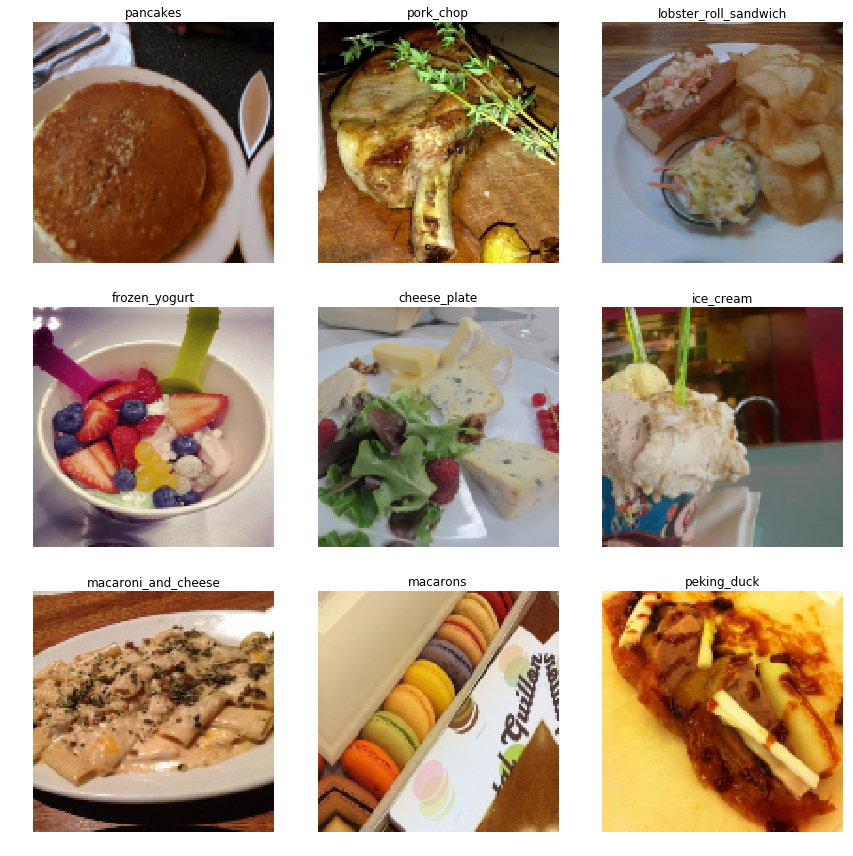

In [17]:
data.show_batch(rows=3)

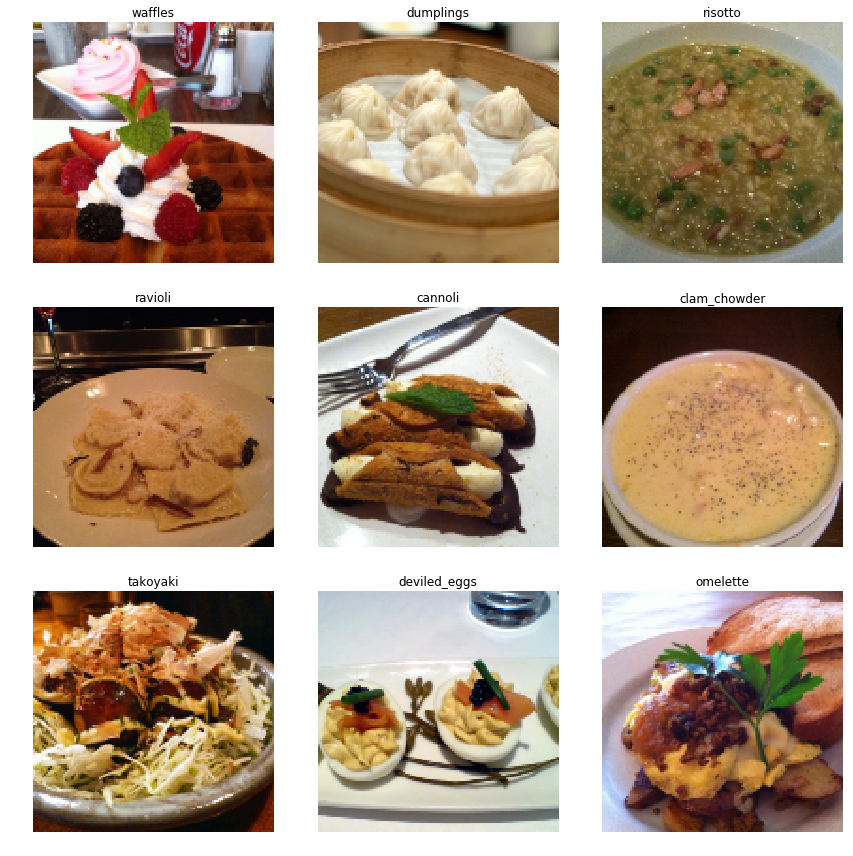

In [24]:
data.show_batch(rows=3,ds_type=DatasetType.Valid)

In [18]:
data.train_ds

LabelList (15129 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
baby_back_ribs,caprese_salad,seaweed_salad,baklava,falafel
Path: /home/jupyter/.fastai/data/food-101/food-101

In [25]:
data.train_ds.x.inner_df[data.train_ds.x.inner_df['label'] == 'deviled_eggs'].count()

fn          156
label       156
is_valid    156
dtype: int64

In [137]:
750 * 0.2

150.0

In [22]:
learn = cnn_learner(data,models.resnet34,metrics=[accuracy,top_k_accuracy])

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02
Min loss divided by 10: 5.75E-03


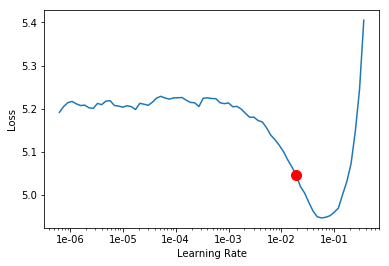

In [32]:
learn.recorder.plot(skip_end=7,suggestion=True)

In [33]:
lr = 5e-3
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.697078,2.758518,0.332282,0.619996,01:23
1,2.911719,2.239968,0.423782,0.724315,00:46
2,2.502563,1.987424,0.485900,0.770854,00:47
3,2.277433,1.883601,0.511733,0.786235,00:46
4,2.045274,1.851757,0.521593,0.793729,00:46


In [34]:
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 2.51E-06


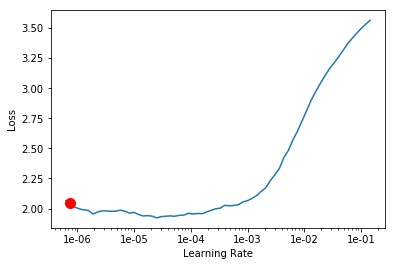

In [38]:
learn.recorder.plot(skip_end=10,suggestion=True)

In [40]:
learn.fit_one_cycle(10,slice(2e-6,lr/5))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.016965,1.806000,0.531848,0.800828,00:46
1,1.940766,1.711501,0.550582,0.815618,00:47
2,1.834063,1.615374,0.572865,0.833563,00:47
3,1.609513,1.554626,0.583317,0.842832,00:47
4,1.405026,1.527258,0.595938,0.847170,00:47
5,1.178100,1.499004,0.608361,0.855255,00:47
6,0.993806,1.488097,0.614080,0.857030,00:47
7,0.858750,1.482281,0.621179,0.854467,00:47
8,0.782875,1.480912,0.619799,0.855453,00:46
9,0.774992,1.474468,0.624729,0.855058,00:46


In [41]:
learn.save('stage-1-128')

In [42]:
data = (ImageList
        .from_csv(path,'total.csv',folder='images')
        .use_partial_data(0.2)
        .split_from_df(col='is_valid')
        .label_from_df(cols='label')
        .transform(get_transforms(),size=224)
        .databunch(bs=64,num_workers=8)
        .normalize(imagenet_stats)
)

In [44]:
learn.load('stage-1-128')

Learner(data=ImageDataBunch;

Train: LabelList (15129 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
baby_back_ribs,caprese_salad,seaweed_salad,baklava,falafel
Path: /home/jupyter/.fastai/data/food-101/food-101;

Valid: LabelList (5071 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
waffles,dumplings,risotto,ravioli,cannoli
Path: /home/jupyter/.fastai/data/food-101/food-101;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [45]:
learn.data = data

In [46]:
learn.freeze_to(-1)

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-03
Min loss divided by 10: 6.31E-08


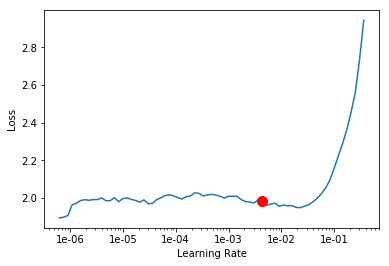

In [51]:
learn.recorder.plot(suggestion=True)

In [53]:
lr = 2e-3
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.138343,1.092436,0.706736,0.912180,01:09
1,1.224382,1.095507,0.703755,0.912180,01:09
2,1.164351,1.083909,0.708921,0.913570,01:09
3,1.083446,1.063297,0.712100,0.914365,01:09
4,0.988067,1.059873,0.714882,0.916352,01:11


In [54]:
learn.unfreeze()

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 3.98E-07


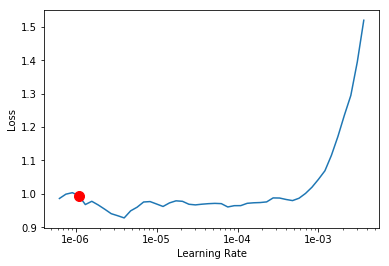

In [61]:
learn.recorder.plot(skip_end=25,suggestion=True)

In [62]:
learn.fit_one_cycle(10,slice(1e-6,lr/5))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,0.978352,1.057616,0.714286,0.915359,01:17
1,0.995037,1.039833,0.720842,0.918736,01:12
2,0.963837,1.048111,0.721836,0.918538,01:10
3,0.852393,1.029145,0.729187,0.917346,01:11
4,0.767149,1.019575,0.728989,0.920326,01:10
5,0.687243,1.009781,0.733161,0.922909,01:10
6,0.615686,1.008531,0.731969,0.921717,01:11
7,0.560701,1.003984,0.736340,0.921717,01:11
8,0.528255,1.003822,0.734949,0.921121,01:10
9,0.511020,1.002857,0.735545,0.923108,01:10


# Fin
1. This the baseline model, with only 20% of data, the accuracy reachs about 73%
2. This is done in about an hour

Problem: 
1. I only use 20% of the validation set, therefore, the result is close but not accurate
2. When resizing, I didn't set seed, therefore the validation set during up-scale size are not same as the small size image, it is not consistant with the first small size img model

Next:
1. Still using sub-set of train (goal is to reach 85% accuracy, if we can use sub-set to reach this goal, we minimize the training time a lot. we will see if a random selected training set can push the goal, we can alwasy switch back to full train set)
2. Use full validation set
3. Use Resnet-50